# Visualizing Data with `pandas` and `matplotlib`
## An introduction to `matplotlib`

### The basics

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
fb = pd.read_csv('book_code/ch_05/data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True)

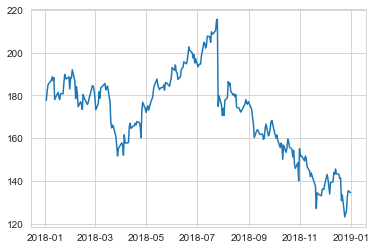

In [3]:
plt.plot(fb.index, fb.open)

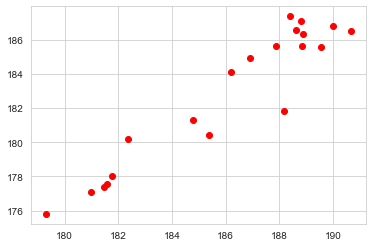

In [4]:
plt.plot('high', 'low', 'ro', data=fb.head(20))

(array([6.400e+01, 4.450e+02, 1.137e+03, 1.853e+03, 2.114e+03, 8.070e+02,
        2.800e+02, 9.200e+01, 9.000e+00, 2.000e+00]),
 array([-1.26 , -0.624,  0.012,  0.648,  1.284,  1.92 ,  2.556,  3.192,
         3.828,  4.464,  5.1  ]),
 <BarContainer object of 10 artists>)

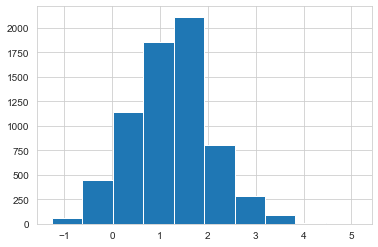

In [5]:
quakes = pd.read_csv('book_code/ch_05/data/earthquakes.csv')
plt.hist(quakes.query('magType == "ml"').mag)

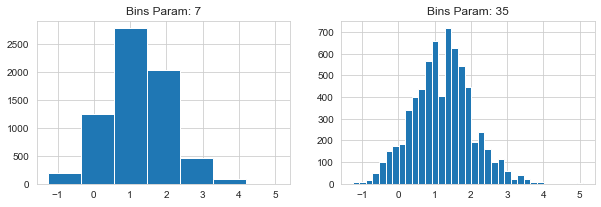

In [6]:
x = quakes.query('magType == "ml"').mag
fig, axes = plt.subplots(1, 2, figsize=(10,3))
for ax, bins in zip(axes, [7,35]):
    ax.hist(x, bins=bins)
    ax.set_title(f'Bins Param: {bins}')

### Plot components

In [7]:
fig=plt.figure()

<Figure size 432x288 with 0 Axes>

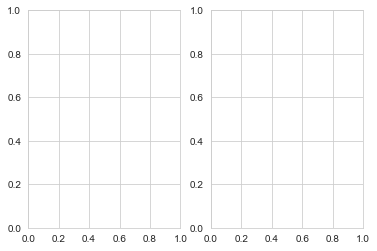

In [8]:
fig, axes = plt.subplots(1,2)

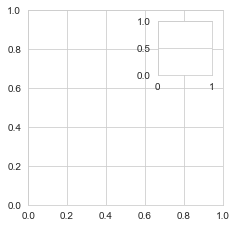

In [9]:
fig = plt.figure(figsize=(3,3))
outside = fig.add_axes([0.1,0.1,0.9,0.9])
inside = fig.add_axes([0.7,0.7,0.25,0.25])

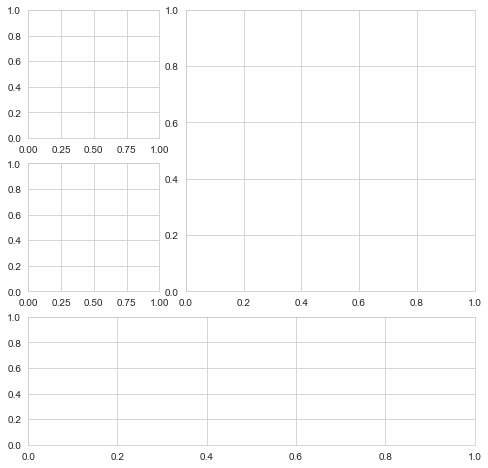

In [10]:
fig = plt.figure(figsize=(8,8))
gs = fig.add_gridspec(3,3)
top_left = fig.add_subplot(gs[0,0])
mid_left = fig.add_subplot(gs[1,0])
top_right = fig.add_subplot(gs[:2,1:])
bottom = fig.add_subplot(gs[2,:])

In [11]:
fig.savefig('empty.png')

In [12]:
plt.close('all')

### Additional options

<Figure size 720x288 with 0 Axes>

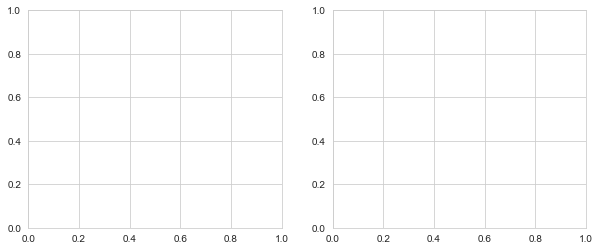

In [13]:
fig = plt.figure(figsize=(10,4))
fig, axes = plt.subplots(1, 2, figsize=(10,4))

In [14]:
import random
import matplotlib as mpl
rcparams_list = list(mpl.rcParams.keys())
random.seed(20)
random.shuffle(rcparams_list)
sorted(rcparams_list[:20])

['axes.formatter.limits',
 'axes.formatter.use_locale',
 'boxplot.whiskerprops.linestyle',
 'contour.negative_linestyle',
 'date.autoformatter.year',
 'legend.labelspacing',
 'lines.dashed_pattern',
 'lines.dotted_pattern',
 'lines.scale_dashes',
 'lines.solid_capstyle',
 'lines.solid_joinstyle',
 'patch.antialiased',
 'path.simplify',
 'pdf.inheritcolor',
 'savefig.orientation',
 'svg.hashsalt',
 'timezone',
 'webagg.open_in_browser',
 'ytick.labelright',
 'ytick.minor.size']

In [15]:
mpl.rcParams['figure.figsize']

[6.0, 4.0]

In [16]:
mpl.rcParams['figure.figsize'] = (300, 10)
mpl.rcParams['figure.figsize']

[300.0, 10.0]

In [17]:
mpl.rcdefaults()
mpl.rcParams['figure.figsize']

[6.4, 4.8]

In [18]:
# Change figsize default to (20,20)
plt.rc('figure', figsize=(20,20))
mpl.rcdefaults() # Reset the default

## Plotting with `pandas`

### Evolution over time

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

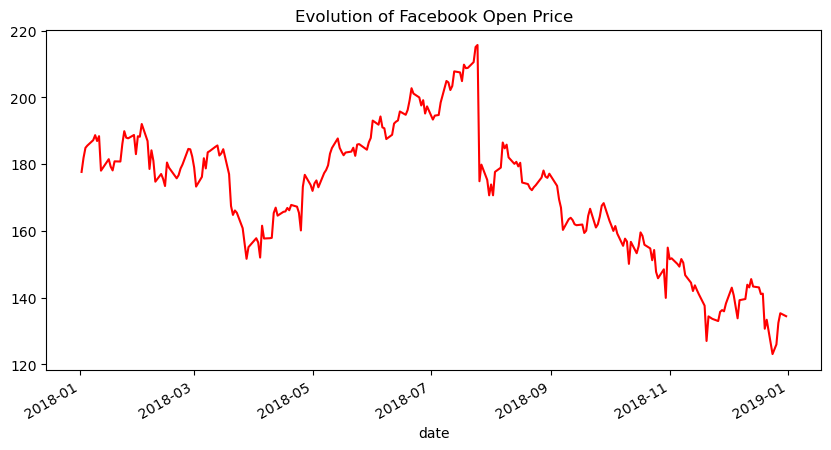

In [19]:
fb.plot(
    kind='line',
    y='open',
    figsize=(10,5),
    style='r-',
    legend=False,
    title='Evolution of Facebook Open Price'
)

<AxesSubplot:title={'center':'Evolution of Facebook Open Price'}, xlabel='date'>

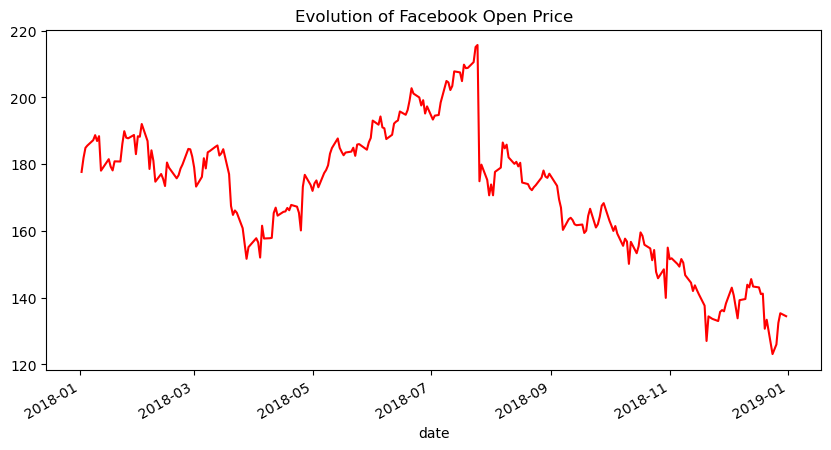

In [20]:
# Style format strings aren't strictly necessary: see `color` and `linestyle`.
fb.plot(
    kind='line',
    y='open',
    figsize=(10,5),
    color='red',
    linestyle='solid',
    legend=False,
    title='Evolution of Facebook Open Price'
)

<AxesSubplot:title={'center':'Facebook OHLC Prices during First Week of Trading 2018'}, xlabel='date'>

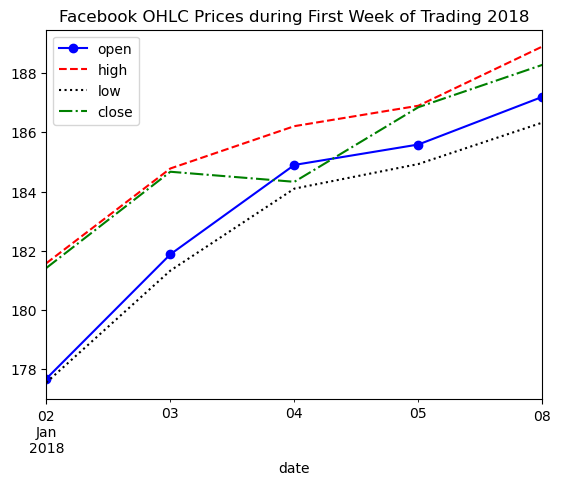

In [21]:
fb.iloc[:5].plot(
    y=['open', 'high', 'low', 'close'],
    style=['b-o', 'r--', 'k:', 'g-.'],
    title='Facebook OHLC Prices during First Week of Trading 2018'

)

array([[<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>],
       [<AxesSubplot:xlabel='date'>, <AxesSubplot:xlabel='date'>]],
      dtype=object)

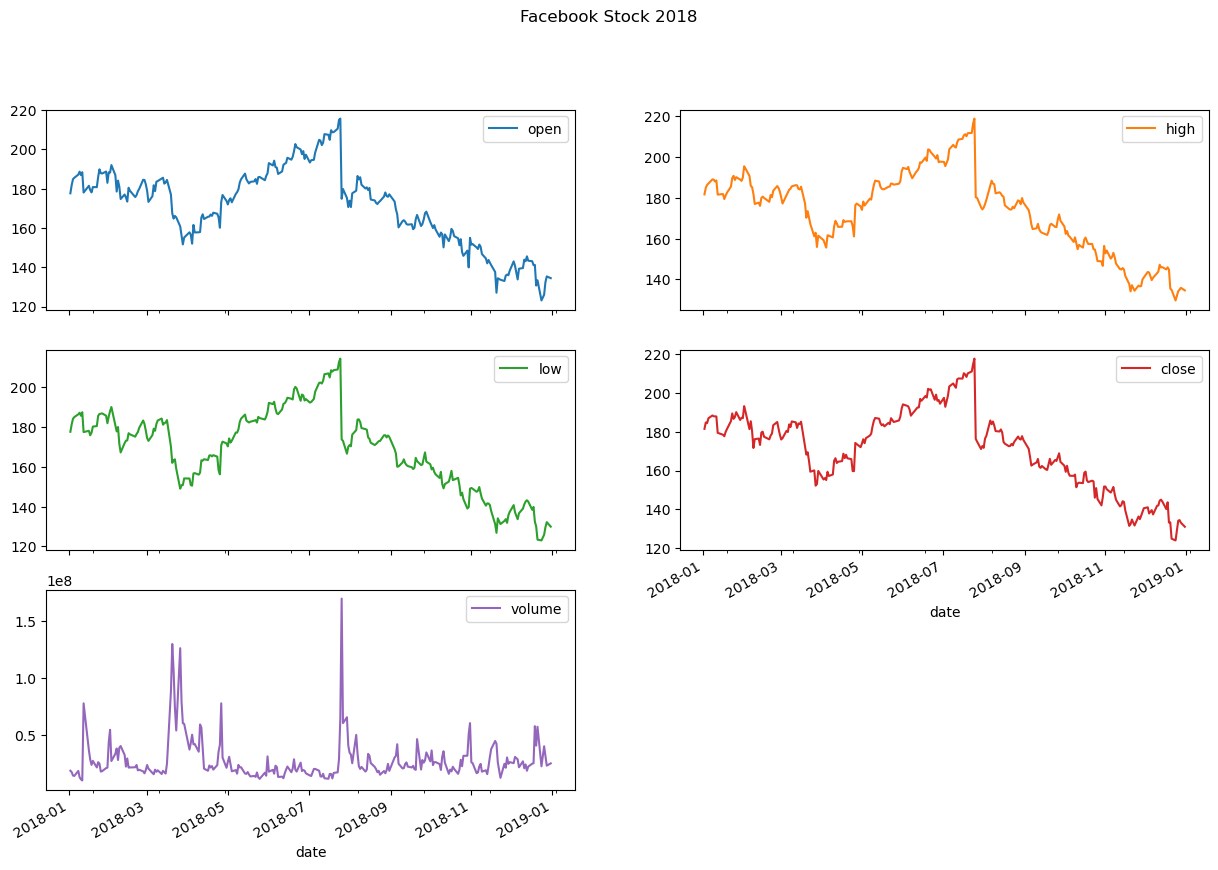

In [22]:
fb.plot(
    kind='line',
    subplots=True,
    layout=(3,2),
    figsize=(15,10),
    title='Facebook Stock 2018'
)

### Relationships between variables

<AxesSubplot:title={'center':'Facebook Daily (High - Low) vs. Traded Volume'}, xlabel='Volume Traded', ylabel='Daily (High - Low)'>

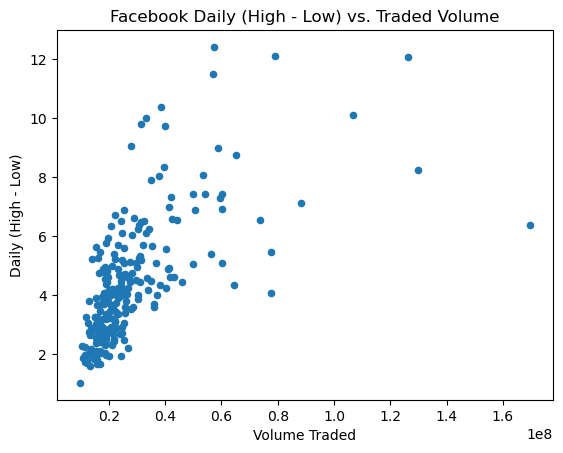

In [23]:
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    xlabel='Volume Traded', ylabel='Daily (High - Low)',
    title='Facebook Daily (High - Low) vs. Traded Volume'
)

<AxesSubplot:title={'center':'Facebook Daily (High - Low) vs. Traded Volume'}, xlabel='Volume Traded', ylabel='Daily (High - Low)'>

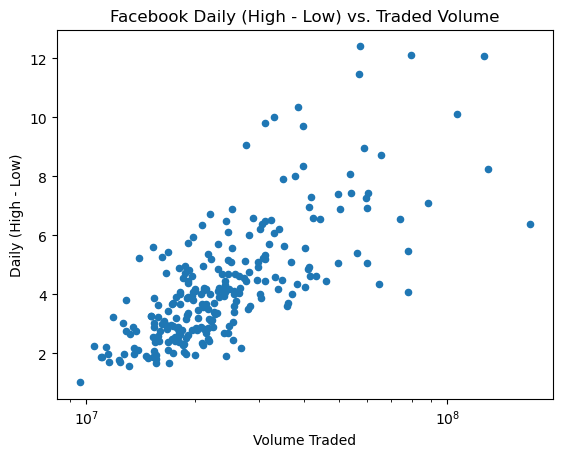

In [24]:
# Change the x-axis to a log scale
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    xlabel='Volume Traded', ylabel='Daily (High - Low)',
    title='Facebook Daily (High - Low) vs. Traded Volume',
    logx=True
)

<AxesSubplot:title={'center':'Facebook Daily (High - Low) vs. Traded Volume'}, xlabel='Volume Traded', ylabel='Daily (High - Low)'>

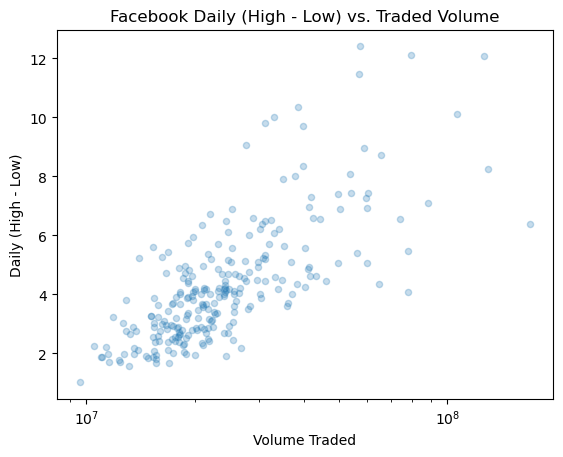

In [25]:
# Change the x-axis to a log scale
fb.assign(
    max_abs_change=fb.high - fb.low
).plot(
    kind='scatter', x='volume', y='max_abs_change',
    xlabel='Volume Traded', ylabel='Daily (High - Low)',
    title='Facebook Daily (High - Low) vs. Traded Volume',
    logx=True,
    alpha=0.25
)

<AxesSubplot:title={'center':'Facebook Daily (High - Low) vs. Traded Volume'}, xlabel='Volume Traded (Log Scale)', ylabel='Daily (High - Low)'>

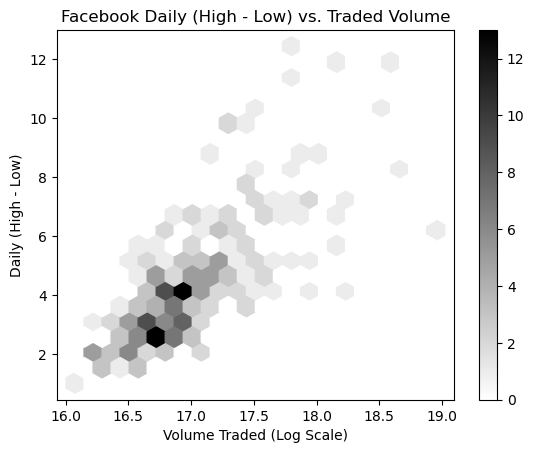

In [26]:
# Change the x-axis to a log scale
fb.assign(
    volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).plot(
    kind='hexbin', x='volume', y='max_abs_change',
    xlabel='Volume Traded (Log Scale)', ylabel='Daily (High - Low)',
    title='Facebook Daily (High - Low) vs. Traded Volume',
    colormap='gray_r',
    gridsize=20,
    sharex=False # Bugfix to keep the x-axis label
)

C:\Users\212454356\AppData\Local\Temp\ipykernel_29416\2167733269.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels, rotation=45)
C:\Users\212454356\AppData\Local\Temp\ipykernel_29416\2167733269.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


[Text(0, -1.0, ''),
 Text(0, 0.0, 'open'),
 Text(0, 1.0, 'high'),
 Text(0, 2.0, 'low'),
 Text(0, 3.0, 'close'),
 Text(0, 4.0, 'volume'),
 Text(0, 5.0, 'log_volume'),
 Text(0, 6.0, 'max_abs_change'),
 Text(0, 7.0, '')]

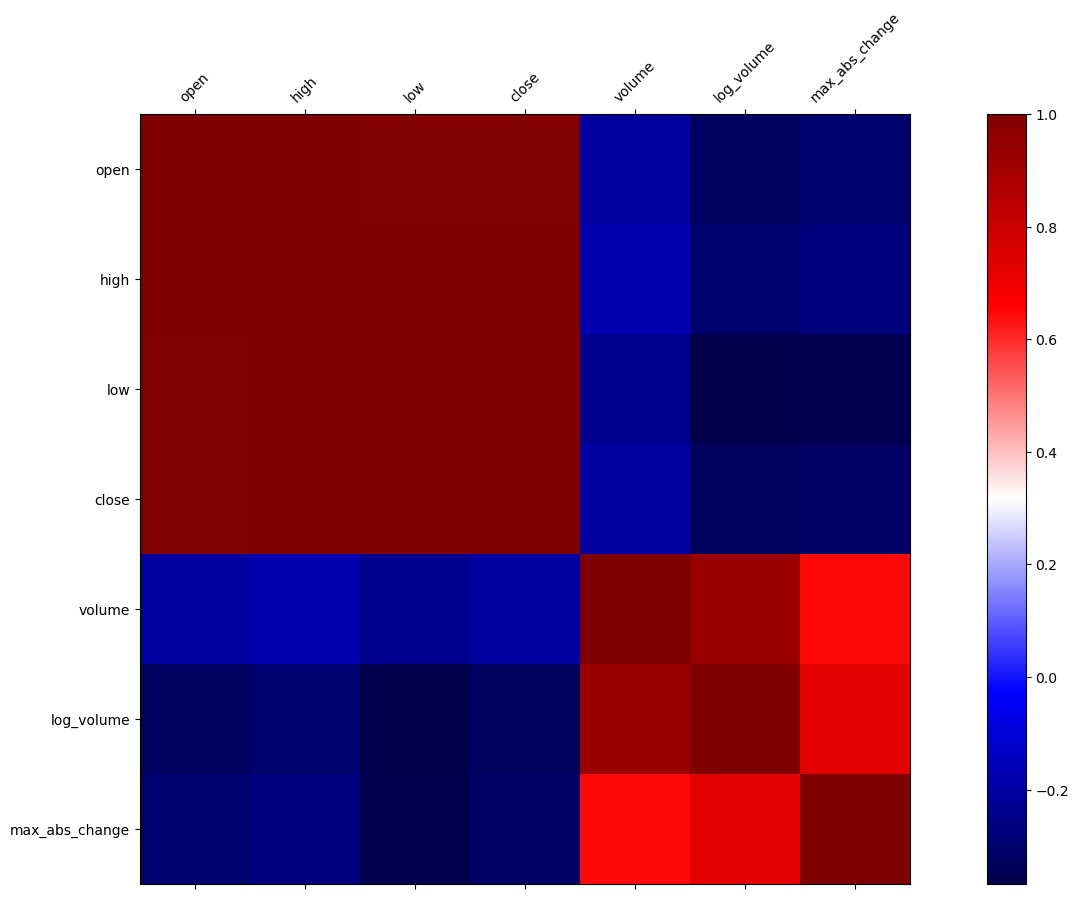

In [27]:
fig, ax = plt.subplots(figsize=(20,10))

fb_corr = fb.assign(
    log_volume=np.log(fb.volume),
    max_abs_change=fb.high - fb.low
).corr()

im = ax.matshow(fb_corr, cmap='seismic')

fig.colorbar(im)

labels = [col.lower() for col in fb_corr.columns]
ax.set_xticklabels([''] + labels, rotation=45)
ax.set_yticklabels([''] + labels)

### Distributions

Text(0.5, 0, 'Volume Traded')

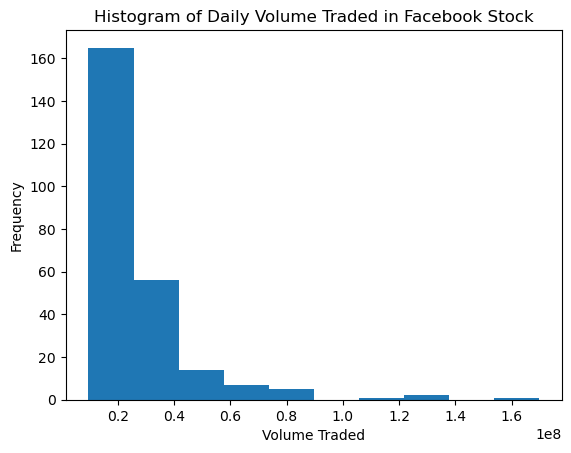

In [28]:
fb.volume.plot(
    kind='hist',
    title='Histogram of Daily Volume Traded in Facebook Stock'
)

plt.xlabel('Volume Traded')

Text(0.5, 0, 'magnitude')

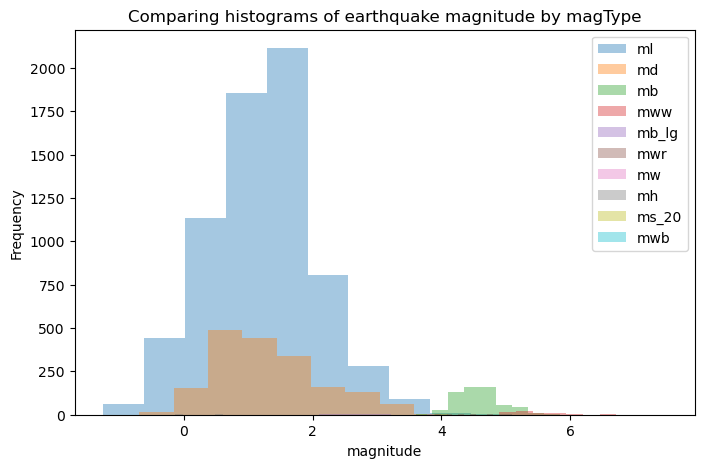

In [29]:
fig, axes = plt.subplots(figsize=(8,5))
for magtype in quakes.magType.unique():
    data = quakes.query(f'magType == "{magtype}"').mag
    if not data.empty:
        data.plot(
            kind='hist', ax=axes, alpha=0.4,
            label=magtype, legend=True,
            title='Comparing histograms of earthquake magnitude by magType'
        )
plt.xlabel('magnitude')

Text(0.5, 0, 'Price ($)')

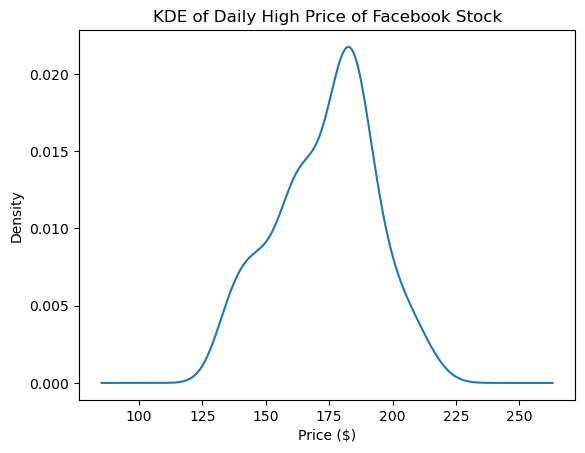

In [30]:
fb.high.plot(
    kind='kde',
    title='KDE of Daily High Price of Facebook Stock'
)
plt.xlabel('Price ($)')

Text(0.5, 1.0, 'ECDF of Earthquake Magnitude with magType ml')

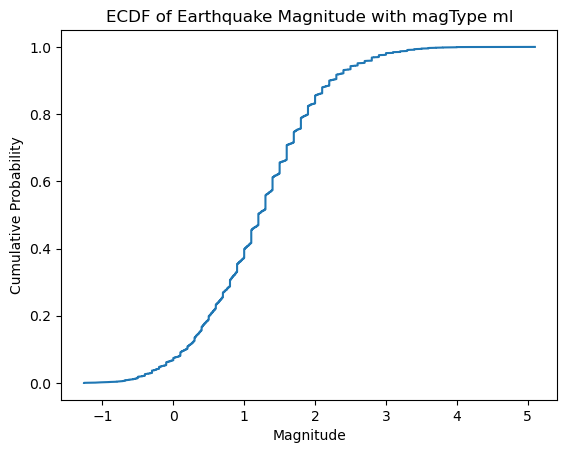

In [34]:
from statsmodels.distributions.empirical_distribution import ECDF
ecdf = ECDF(quakes.query('magType == "ml"').mag)
plt.plot(ecdf.x, ecdf.y)

plt.xlabel('Magnitude')
plt.ylabel('Cumulative Probability')
plt.title('ECDF of Earthquake Magnitude with magType ml')

Text(0.5, 0, 'Price ($)')

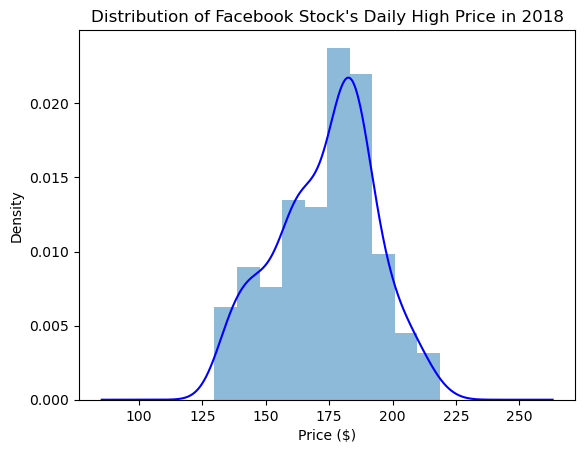

In [35]:
ax = fb.high.plot(kind='hist', density=True, alpha=0.5)
fb.high.plot(
    kind='kde', ax=ax, color='blue',
    title='Distribution of Facebook Stock\'s Daily High Price in 2018'
)
plt.xlabel('Price ($)')

Text(0, 0.5, 'Price ($)')

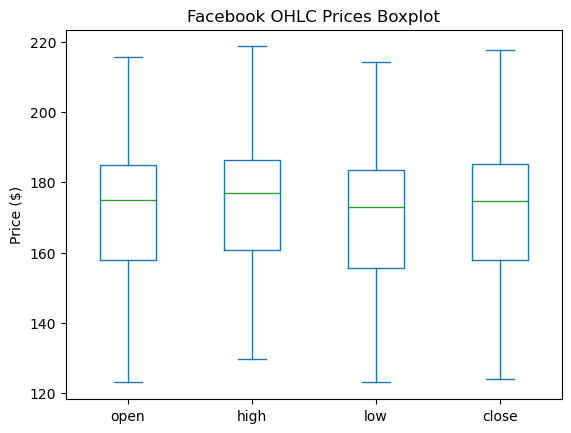

In [36]:
fb.iloc[:,:4].plot(
    kind='box',
    title='Facebook OHLC Prices Boxplot'
)
plt.ylabel('Price ($)')

Text(0.5, 1.1, 'Facebook OHLC Boxplots by Volume Traded')

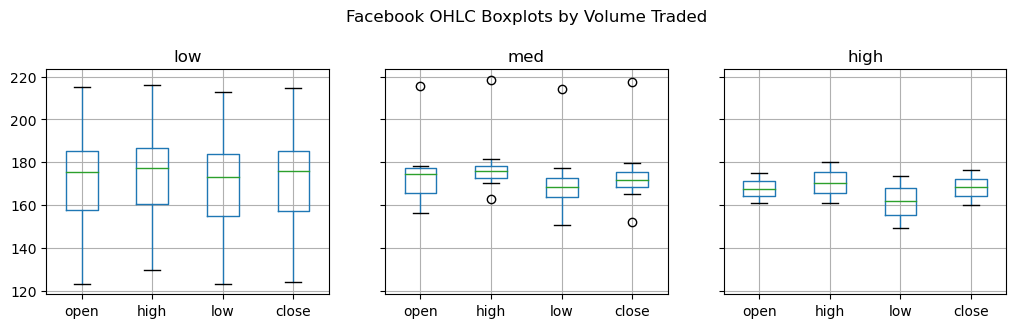

In [37]:
fb.assign(
    volume_bin=pd.cut(fb.volume, 3, labels=['low', 'med', 'high'])
).groupby('volume_bin').boxplot(
    column=['open', 'high', 'low', 'close'],
    layout=(1,3),
    figsize=(12,3)
)
plt.suptitle('Facebook OHLC Boxplots by Volume Traded', y=1.1)

Text(0, 0.5, 'Magnitude')

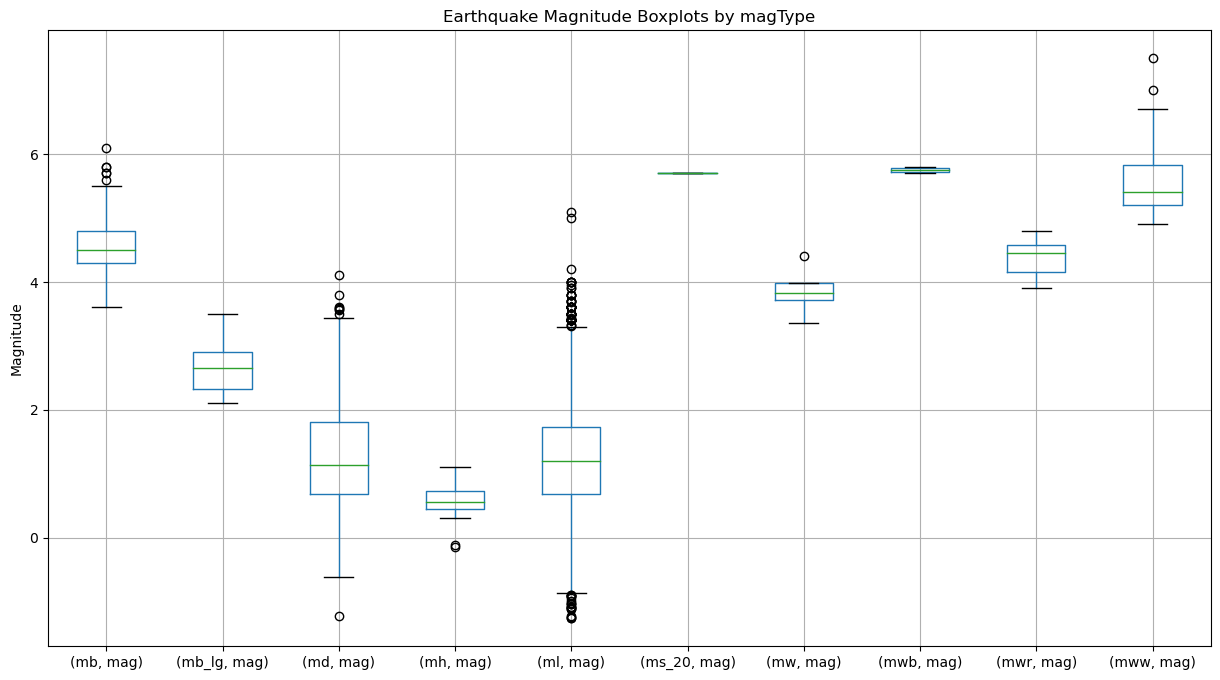

In [38]:
quakes[['mag', 'magType']].groupby('magType').boxplot(
    figsize=(15,8), subplots=False
)
plt.title('Earthquake Magnitude Boxplots by magType')
plt.ylabel('Magnitude')

### Counts and frequencies

Text(0, 0.5, 'Volume')

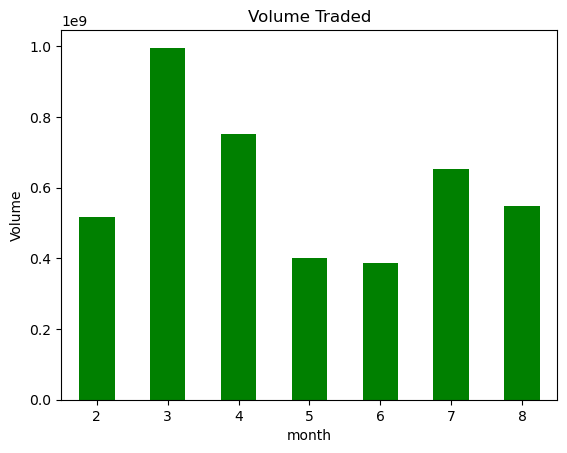

In [39]:
fb['2018-02':'2018-08'].assign(month = lambda x: x.index.month).groupby('month').sum().volume.plot.bar(
    color='green', rot=0, title='Volume Traded'
)
plt.ylabel('Volume')

Text(0.5, 0, 'Earthquakes')

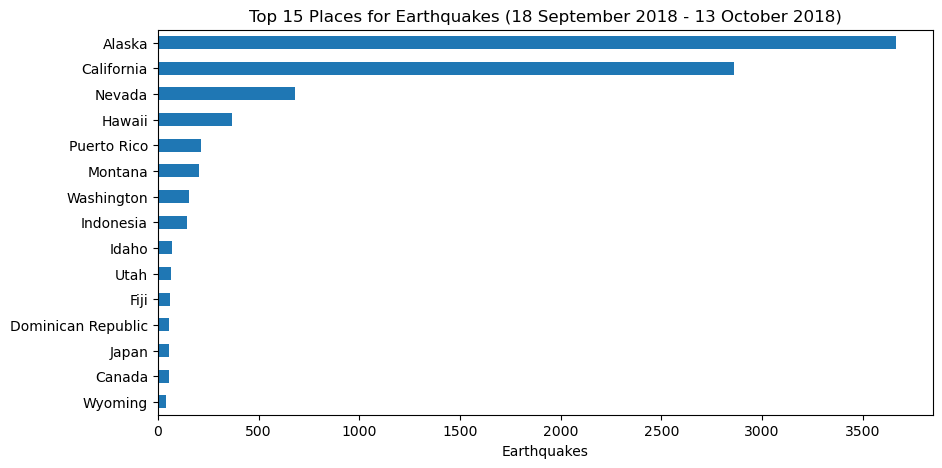

In [40]:
quakes.parsed_place.value_counts().iloc[14::-1].plot(
    kind='barh', figsize=(10,5),
    title='Top 15 Places for Earthquakes (18 September 2018 - 13 October 2018)'
)
plt.xlabel('Earthquakes')

In [41]:
# Why `.iloc` backwards from the 15th spot? It basically creates a bar chart of the most interesting entries in `parsed_place.
quakes.parsed_place.value_counts()

Alaska                     3665
California                 2861
Nevada                      681
Hawaii                      367
Puerto Rico                 216
                           ... 
Queen Charlotte Islands       1
Uzbekistan                    1
Prince Edward Islands         1
Martinique                    1
New Mexico                    1
Name: parsed_place, Length: 110, dtype: int64

Text(0.5, 0, 'Tsunamis')

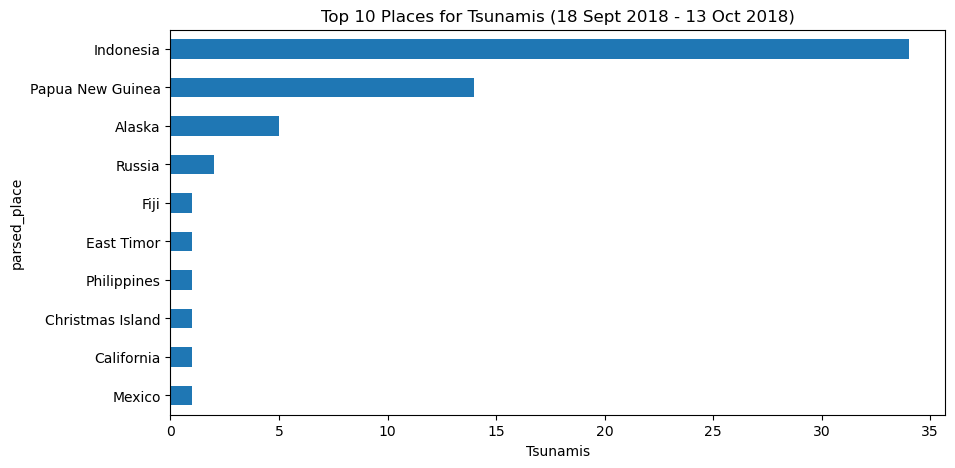

In [42]:
quakes.groupby('parsed_place').tsunami \
    .sum().sort_values().iloc[-10::,].plot(
    kind='barh', figsize=(10,5),
    title='Top 10 Places for Tsunamis (18 Sept 2018 - 13 Oct 2018)'
)
plt.xlabel('Tsunamis')

Text(0, 0.5, 'count')

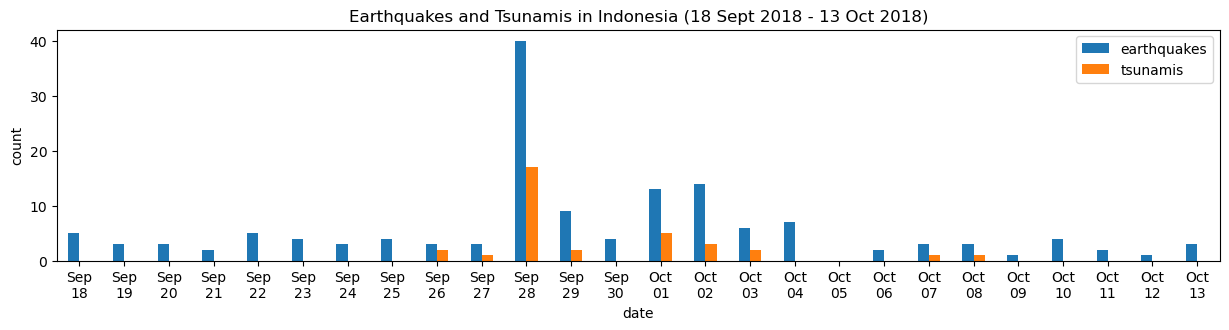

In [43]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"')\
    .assign(time=lambda x: pd.to_datetime(x.time, unit='ms'), earthquake = 1)\
    .set_index('time').resample('1D').sum()

indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot(
    y=['earthquake', 'tsunami'], kind='bar', figsize=(15,3),
    rot=0, label=['earthquakes', 'tsunamis'],
    title='Earthquakes and Tsunamis in Indonesia (18 Sept 2018 - 13 Oct 2018)'
)

plt.xlabel('date')
plt.ylabel('count')

Text(0, 0.5, 'earthquakes')

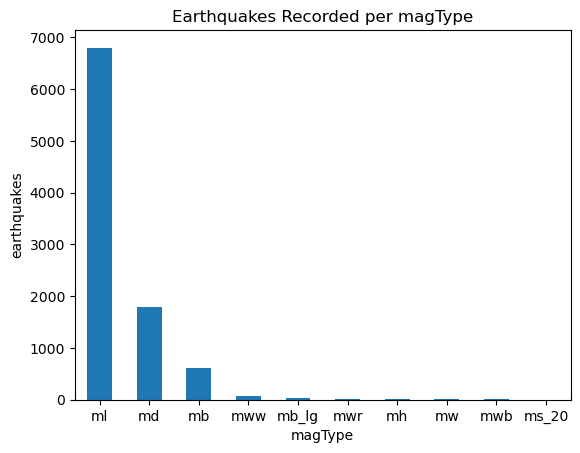

In [44]:
quakes.magType.value_counts().plot(
    kind='bar', title='Earthquakes Recorded per magType', rot=0
)

plt.xlabel('magType')
plt.ylabel('earthquakes')

Text(0, 0.5, 'earthquakes')

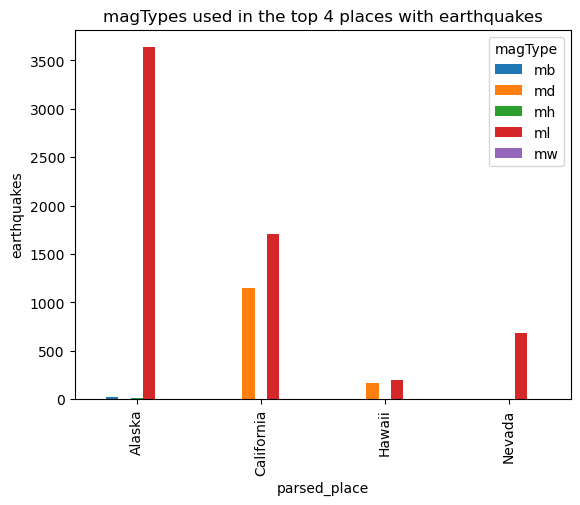

In [45]:
quakes[
    quakes.parsed_place.isin(['California', 'Alaska', 'Nevada', 'Hawaii'
                              ])
].groupby(['parsed_place', 'magType']).mag.count().unstack().plot.bar(
    title='magTypes used in the top 4 places with earthquakes'
)
plt.ylabel('earthquakes')

There are two examples of stacked bar charts: nominal and normalized. Refer to this section if I want to do a categorical portion of a whole.

## The `pandas.plotting` subpackage

### Scatter matrices

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

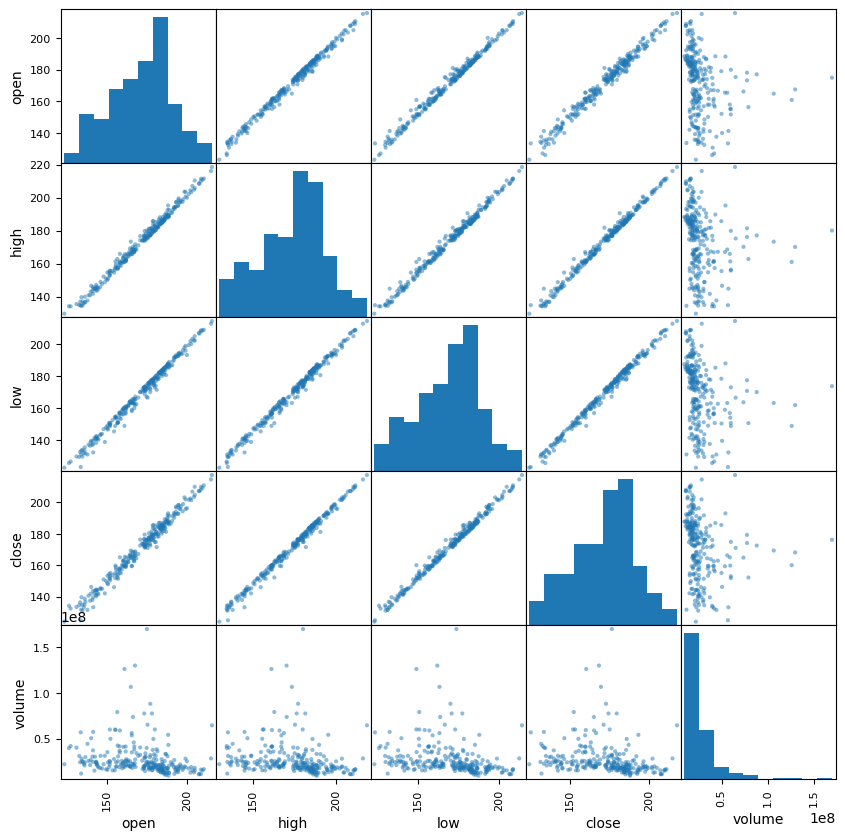

In [46]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10,10))

array([[<AxesSubplot:xlabel='open', ylabel='open'>,
        <AxesSubplot:xlabel='high', ylabel='open'>,
        <AxesSubplot:xlabel='low', ylabel='open'>,
        <AxesSubplot:xlabel='close', ylabel='open'>,
        <AxesSubplot:xlabel='volume', ylabel='open'>],
       [<AxesSubplot:xlabel='open', ylabel='high'>,
        <AxesSubplot:xlabel='high', ylabel='high'>,
        <AxesSubplot:xlabel='low', ylabel='high'>,
        <AxesSubplot:xlabel='close', ylabel='high'>,
        <AxesSubplot:xlabel='volume', ylabel='high'>],
       [<AxesSubplot:xlabel='open', ylabel='low'>,
        <AxesSubplot:xlabel='high', ylabel='low'>,
        <AxesSubplot:xlabel='low', ylabel='low'>,
        <AxesSubplot:xlabel='close', ylabel='low'>,
        <AxesSubplot:xlabel='volume', ylabel='low'>],
       [<AxesSubplot:xlabel='open', ylabel='close'>,
        <AxesSubplot:xlabel='high', ylabel='close'>,
        <AxesSubplot:xlabel='low', ylabel='close'>,
        <AxesSubplot:xlabel='close', ylabel='close'>,
    

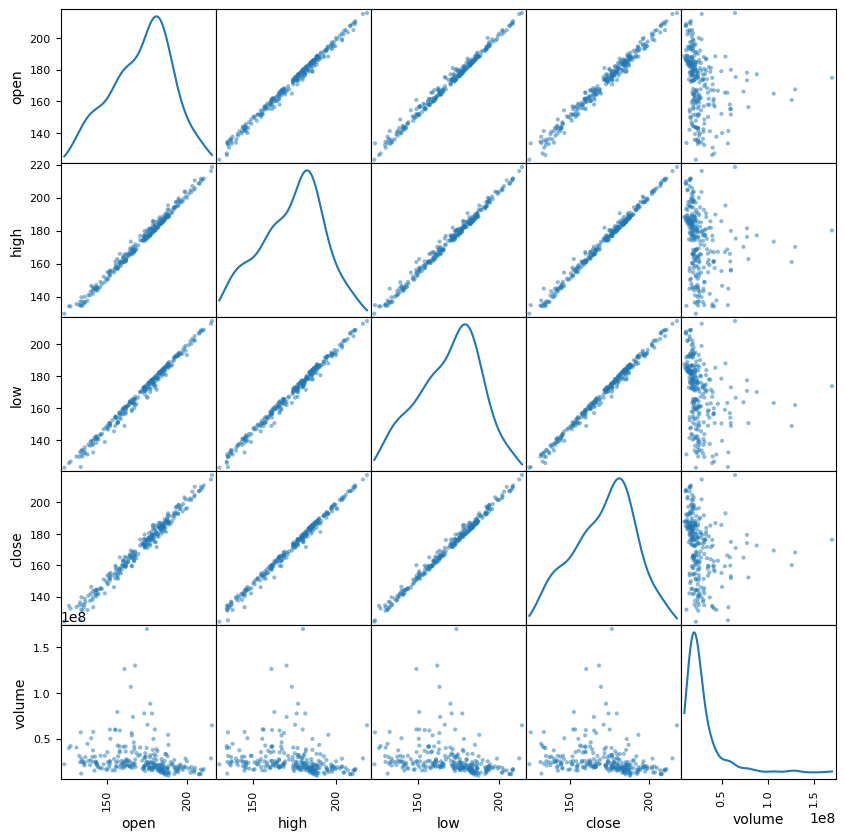

In [47]:
from pandas.plotting import scatter_matrix
scatter_matrix(fb, figsize=(10,10), diagonal='kde')

### Lag plots

Lag plots check for relationships over time.

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

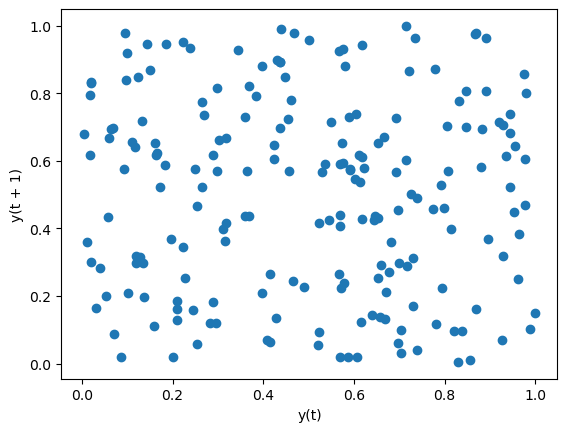

In [48]:
# A completely random plot will have no correlative pattern.

from pandas.plotting import lag_plot
np.random.seed(0)
lag_plot(pd.Series(np.random.random(size=200)))

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

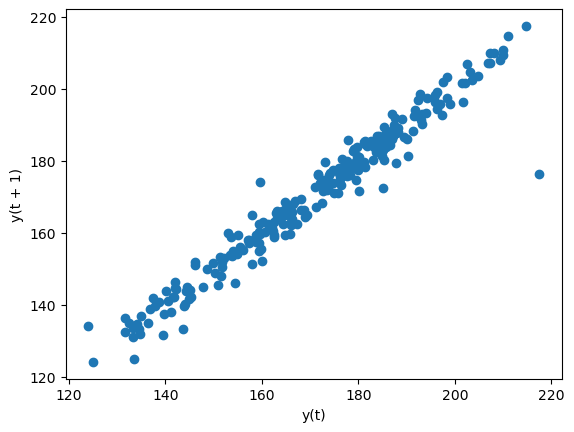

In [49]:
# The prices of Facebook stock are related to what happened the day before.

lag_plot(fb.close)

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 5)'>

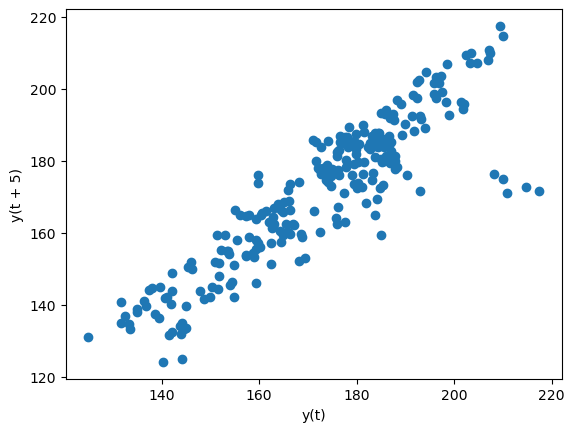

In [50]:
# Compare each value to the value a week before. The correlation is slightly weaker.

lag_plot(fb.close, lag=5)

### Autocorrelation plots

Autocorrelation means that the time series is correlated with the lagged version of itself. Random data will have an autocorrelation around zero and within the confidence bands.

[Interpreting ACF and PACF Plots for Time Series Forecasting](https://towardsdatascience.com/interpreting-acf-and-pacf-plots-for-time-series-forecasting-af0d6db4061c)

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

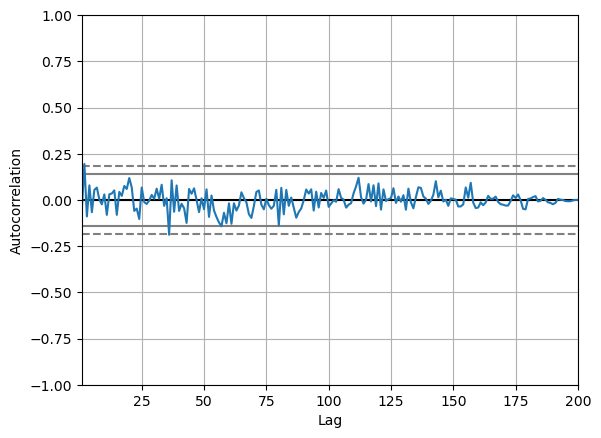

In [51]:
from pandas.plotting import autocorrelation_plot
np.random.seed(0)
autocorrelation_plot(np.random.random(size=200))

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

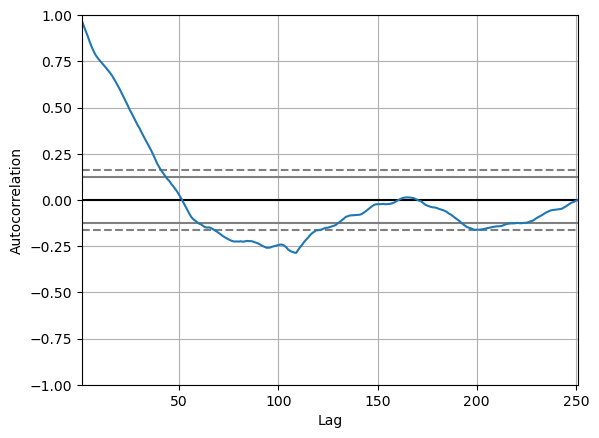

In [52]:
autocorrelation_plot(fb.close)

### Bootstrap plots

[Bootstrap plot (NIST Engineering Statistics Handbook)](https://www.itl.nist.gov/div898/handbook/eda/section3/bootplot.htm)

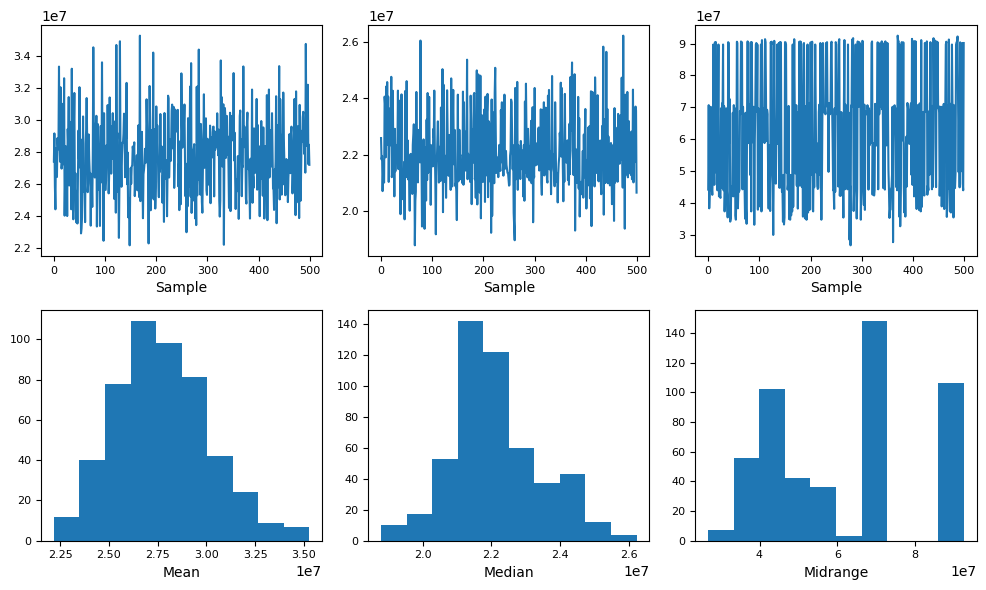

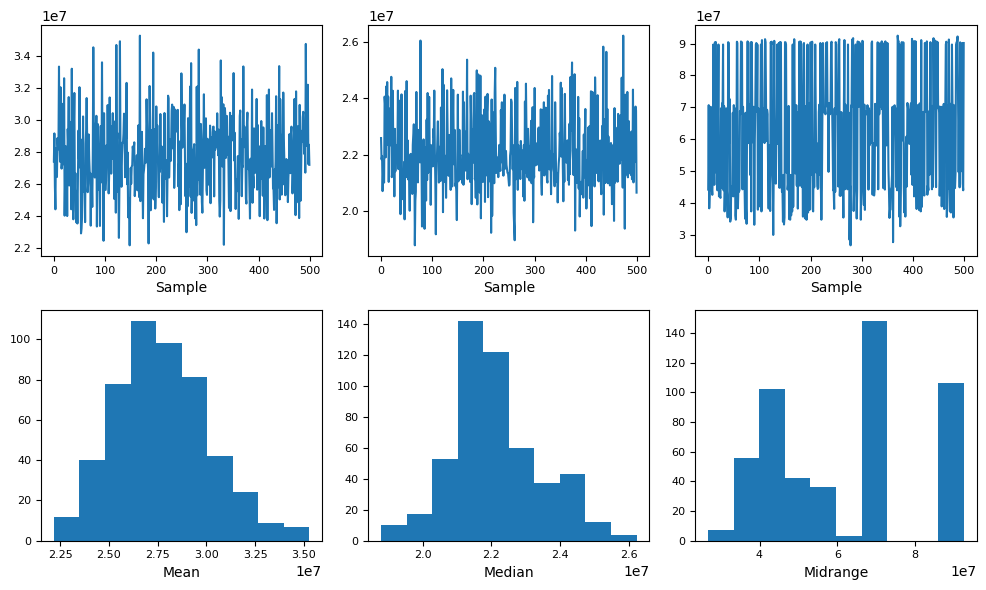

In [53]:
from pandas.plotting import bootstrap_plot
bootstrap_plot(fb.volume, fig=plt.figure(figsize=(10,6)))

## Messing around

In [54]:
testDF = quakes.groupby(pd.Grouper(key='magType')).mean()